08/02/2022: tested with v0.6   
19/04/2022: v0.6.5

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.light_palette("caramel",50,input="xkcd")
import pandas as pd

from IPython.display import display, HTML, clear_output
from scipy.special import logsumexp
from scipy.stats import norm

from pyspch.core.sequence_data import make_seq1, make_seq1d
from pyspch import Densities 
import pyspch.display as Spd
import pyspch.core as Spch

In [2]:
# A wrapper class around CategoricalNB
# The logprob equivalent to Densities.Discrete
class Dist_Discr(CategoricalNB):
    """
    feature_log_prob_ : list of arrays of shape (n_features,)
        Each holds an array of shape (n_classes, n_categories of respective feature) for each feature.
    """
    def print_model(self,per_class=False):
        if per_class:
            n_classes = len(self.classes_)
            for i in range(n_classes): self.print_class(i)
        else:
            n_features = len(self.feature_log_prob_)
            for i in range(n_features): self.print_feature(i)
            
    def print_feature(self,feat_id):            
        print(" ++ Feature(%d) ++ "%feat_id)
        proba = np.exp(self.feature_log_prob_[feat_id])
        print(proba)

    def predict_log_prob(self,X):
        jll = np.zeros((X.shape[0], self.class_count_.shape[0]))
        for i in range(self.n_features_in_):
            indices = X[:, i]
            jll += self.feature_log_prob_[i][:, indices].T
        return jll
    
    def predict_prob(self,X):
        return( np.exp( self.predict_log_prob(X)))
    
    def get_class_log_proba(self,class_id):
        """ get probs per class as n_feature lists of prob arrasy """
        class_data = []
        n_features = len(self.feature_log_prob_)
        for j in range(n_features):
            proba = self.feature_log_prob_[j][class_id,:]
            class_data.append(proba)
        return(class_data)
    
    def get_class_proba(self,class_id):
        """ get probs per class as n_feature lists of prob arrasy """
        class_data = []
        n_features = len(self.feature_log_prob_)
        for j in range(n_features):
            proba = np.exp(self.feature_log_prob_[j][class_id,:])
            class_data.append(proba)
        return(class_data)
    
    def print_class(self,class_id):
        print(" ++ Class(%d) ++ "%class_id)
        n_features = len(self.feature_log_prob_)
        for j in range(n_features):
            proba = np.exp(self.feature_log_prob_[j][class_id,:])
            print(proba)

    def plot_model(self):
        barwidth = .2
        n_features = len(self.feature_log_prob_)
        f,ax = plt.subplots(1,n_features,figsize=(14,5))
        for j in range(n_features):
            proba = np.exp(self.feature_log_prob_[j])
            nclass,nbins = proba.shape
            xs = np.arange(nbins)
            for i in range(nclass):
                ax[j].bar(xs+i*barwidth,proba[i,:],width=barwidth)
                ax[j].set_xticks([xx for xx in range(nbins) ])
            ax[j].legend(np.arange(nclass))


''

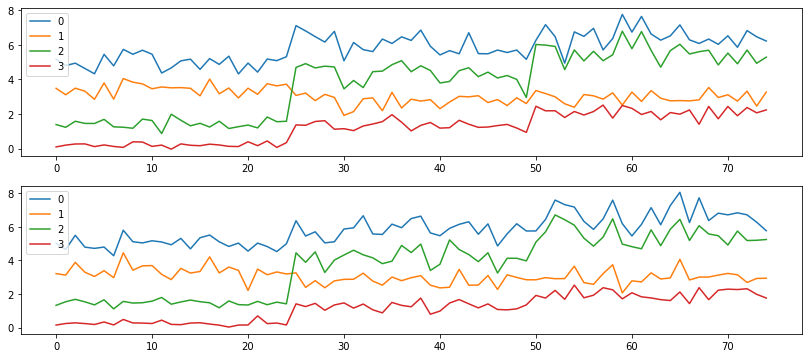

In [8]:
(X1,y1)= make_seq1(subset=1)
(X2,y2)= make_seq1(subset=2)
f,ax=plt.subplots(2,figsize=(14,6))
ax[0].plot(X1)
ax[1].plot(X2)
ax[0].legend(np.arange(4))
ax[1].legend(np.arange(4))
;

In [9]:
gmm1 = Densities.GMM()

In [10]:
gmm1.__repr__

<bound method BaseEstimator.__repr__ of GMM()>

In [11]:
gModel1 = Densities.Gaussian()
gModel1.fit(X1, y1)
gModel1.print_model()

Means
[[5.00488857 3.4642407  1.43638246 0.20875317]
 [6.01116838 2.75765911 4.32461378 1.34737115]
 [6.50408616 2.96610098 5.55579286 2.10783786]]
Variance
[[0.16743035 0.10869988 0.05881252 0.013375  ]
 [0.31181482 0.11741582 0.25527012 0.05012797]
 [0.33460545 0.09186428 0.29877743 0.07899455]]


In [12]:
g47 = GaussianNB()
g47.__repr__
gModel1._get_param_names()

['priors', 'var_smoothing']

In [13]:
gModel1._get_param_names()

['priors', 'var_smoothing']

In [14]:
gModel1 = Densities.Gaussian()
gModel1.fit(X1, y1)

Gaussian()

In [15]:
gModel1.__repr__

<bound method BaseEstimator.__repr__ of Gaussian()>

### Gaussian Distributions
#### 1. Training
Train on Set 1 and Test on Set 2

In [16]:
gModel1 = Densities.Gaussian()
gModel1.__dict__

{'priors': None, 'var_smoothing': 1e-09}

In [17]:

gModel1.__dict__

{'priors': None, 'var_smoothing': 1e-09}

In [18]:
gModel1.__repr__()

'Gaussian()'

In [19]:
# create some data
#
# train a Gaussian model from the training data
gModel1 = Densities.Gaussian()
gModel1.fit(X1, y1)
gModel1.print_model()

Means
[[5.00488857 3.4642407  1.43638246 0.20875317]
 [6.01116838 2.75765911 4.32461378 1.34737115]
 [6.50408616 2.96610098 5.55579286 2.10783786]]
Variance
[[0.16743035 0.10869988 0.05881252 0.013375  ]
 [0.31181482 0.11741582 0.25527012 0.05012797]
 [0.33460545 0.09186428 0.29877743 0.07899455]]


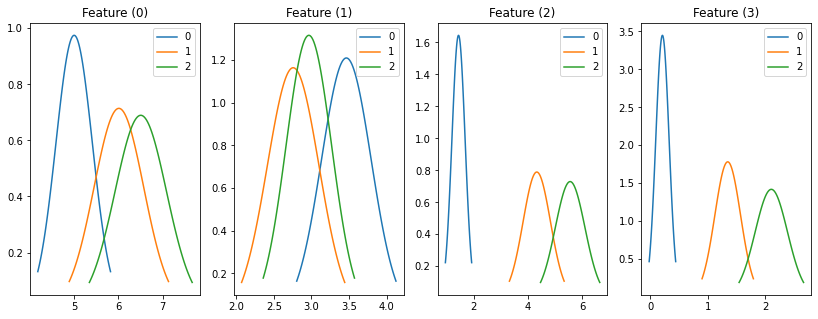

In [20]:
gModel1.plot_model()

In [21]:
gModel1.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'classes_': array([0, 1, 2]),
 'n_features_in_': 4,
 'epsilon_': 3.1850893701399744e-09,
 'theta_': array([[5.00488857, 3.4642407 , 1.43638246, 0.20875317],
        [6.01116838, 2.75765911, 4.32461378, 1.34737115],
        [6.50408616, 2.96610098, 5.55579286, 2.10783786]]),
 'var_': array([[0.16743035, 0.10869988, 0.05881252, 0.013375  ],
        [0.31181482, 0.11741582, 0.25527012, 0.05012797],
        [0.33460545, 0.09186428, 0.29877743, 0.07899455]]),
 'class_count_': array([25., 25., 25.]),
 'class_prior_': array([0.33333333, 0.33333333, 0.33333333])}

In [22]:
mu = np.array([
    [5.5, 3.5, 3.,.5],
    [6., 2.75, 4., 1.5  ],
    [6.5, 3.0, 5., 2.]
])
gModel2 = Densities.Gaussian()
gModel2.init_model(mu=mu,class_prior=[.5,.2,.3])
#gModel2.var_ = np.ones((gModel2.theta_.shape))
#gModel2.n_features_in_ = 4
#gModel2.class_prior_ = np.ones(gModel2.n_classes)/gModel2.n_classes
gModel2.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'n_classes': 3,
 'n_features_in_': 4,
 'theta_': array([[5.5 , 3.5 , 3.  , 0.5 ],
        [6.  , 2.75, 4.  , 1.5 ],
        [6.5 , 3.  , 5.  , 2.  ]]),
 'var_': array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 'classes_': array([0, 1, 2]),
 'class_prior_': array([0.5, 0.2, 0.3])}

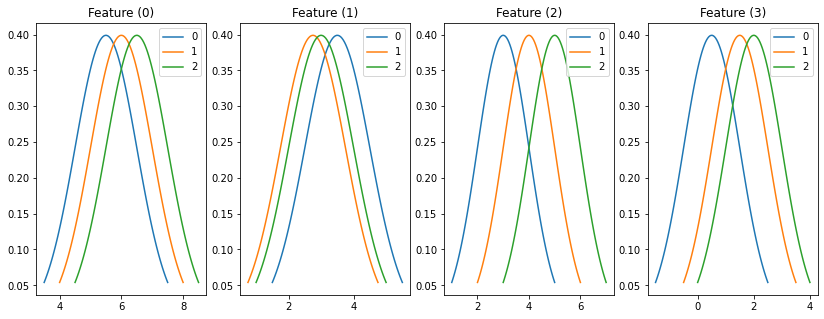

In [23]:
gModel2.plot_model()

### Posteriors and Log Posteriors

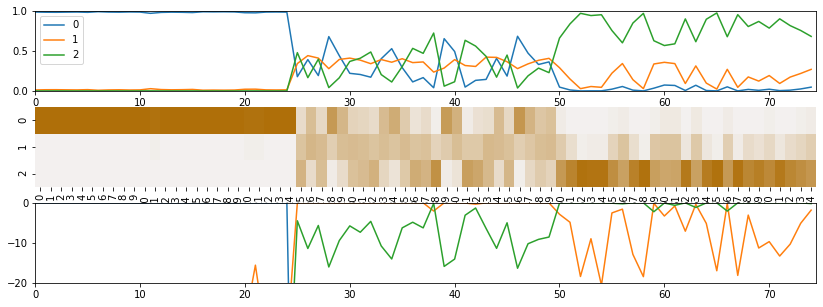

In [24]:
probs=gModel2.predict_proba(X2)
log_probs=gModel1.predict_log_proba(X2)
f,ax=plt.subplots(3,figsize=(14,5))
ax[0].plot(probs)
ax[0].set_xlim([0.,probs.shape[0]-.5])
ax[0].set_ylim([0,1.])
ax[0].legend(gModel1.classes_)
sns.heatmap(probs.T,ax=ax[1],vmax=1,vmin=0.0,yticklabels=gModel1.classes_,
            cmap=cmap,cbar=False, linewidth=0, linecolor='k')
ax[2].plot(log_probs)
ax[2].set_xlim([0.,probs.shape[0]-.5])
ax[2].set_ylim([-20,0.]);

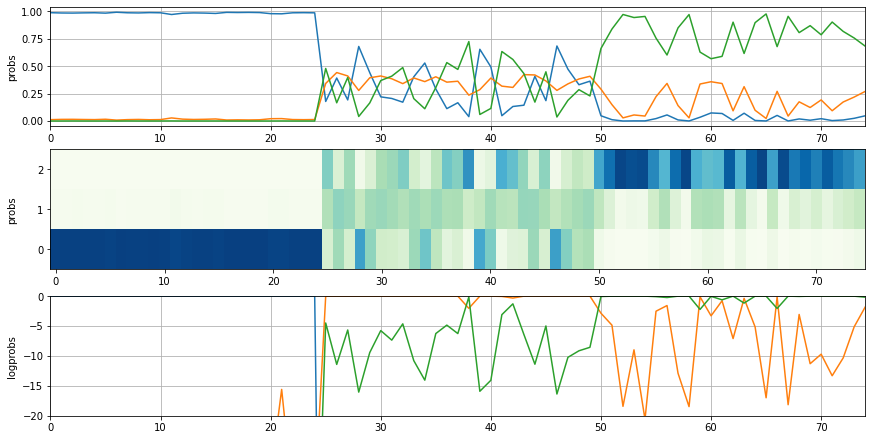

In [25]:
fig = Spd.SpchFig(row_heights=[1.,1.,1.])
fig.add_line_plot(probs.T,iax=0,ylabel='probs')
fig.add_img_plot(probs.T,iax=1,cmap='GnBu',ylabel='probs')
fig.add_line_plot(log_probs.T,iax=2,yrange=[-20.,0.],ylabel='logprobs')
display(fig)

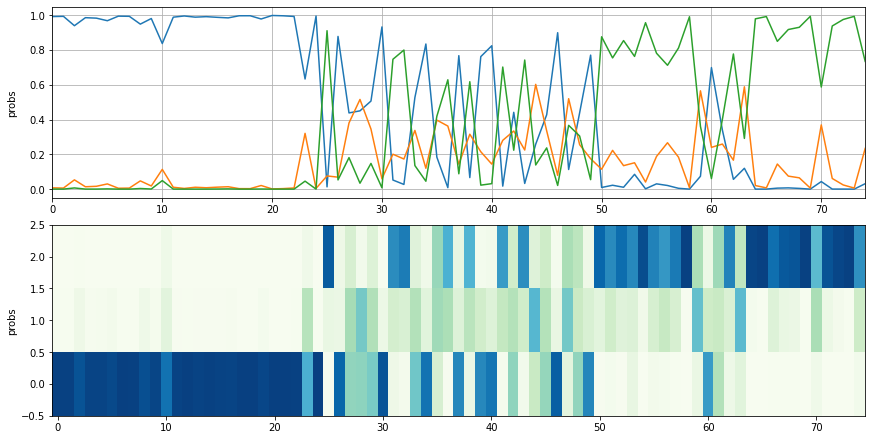

In [26]:
# let's make a bit harder by adding some noise to the test data
X3 = X2 + np.random.normal(loc=0.,scale=1,size=X2.shape)
probs=gModel2.predict_proba(X3)
log_probs=gModel1.predict_log_proba(X3)
fig = Spd.SpchFig(row_heights=[1.,1.])
fig.add_line_plot(probs.T,iax=0,ylabel='probs')
fig.add_img_plot(probs.T,iax=1,cmap='GnBu',ylabel='probs')
display(fig)

### Classification

In [27]:
y_pred = gModel2.predict(X2)
print("Test Set: Number of mislabeled points out of a total %d points : %d" % (X2.shape[0], (y2 != y_pred).sum()))
y_pred = gModel2.predict(X3)
print("Noisy Set: Number of mislabeled points out of a total %d points : %d" % (X3.shape[0], (y2 != y_pred).sum()))

Test Set: Number of mislabeled points out of a total 75 points : 18
Noisy Set: Number of mislabeled points out of a total 75 points : 25


## Discrete Densities aka Categorical NB

In [29]:
(X1d,y1) = make_seq1d(subset=1)
(X2d,y2) = make_seq1d(subset=2)
(X3d,y3) = make_seq1d(noise=1,subset=2)
#

In [30]:
X1d = X1d[:,0:2]
X2d = X2d[:,0:2]
X3d = X3d[:,0:2]

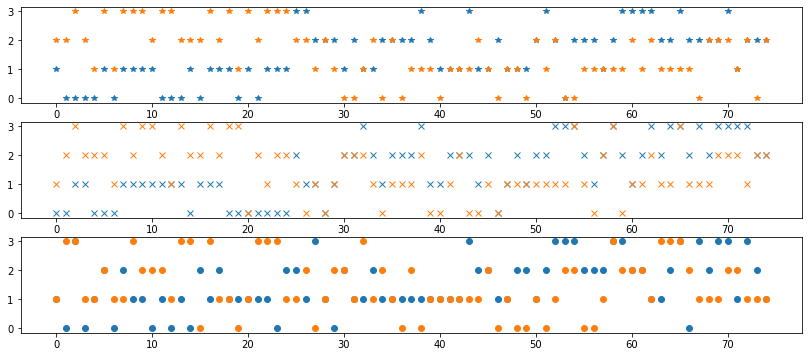

In [31]:
f,ax=plt.subplots(3,figsize=(14,6))
ax[0].plot(X1d,'*')
ax[1].plot(X2d,'x');
ax[2].plot(X3d,'o');

In [32]:
dd1 = Dist_Discr()
dd1.fit(X=X1d,y=y1)

Dist_Discr()

In [33]:
dd1._get_param_names()

['alpha', 'class_prior', 'fit_prior', 'min_categories']

In [34]:
dd1.get_params(), dd1.__dict__

({'alpha': 1.0,
  'class_prior': None,
  'fit_prior': True,
  'min_categories': None},
 {'alpha': 1.0,
  'fit_prior': True,
  'class_prior': None,
  'min_categories': None,
  'n_features_in_': 2,
  'classes_': array([0, 1, 2]),
  'class_count_': array([25., 25., 25.]),
  'category_count_': [array([[11., 14.,  0.,  0.],
          [ 0., 11., 10.,  4.],
          [ 1.,  2., 15.,  7.]]),
   array([[ 0.,  3.,  9., 13.],
          [ 7., 12.,  6.,  0.],
          [ 4., 12.,  9.,  0.]])],
  'n_categories_': array([4, 4]),
  'feature_log_prob_': [array([[-0.88238918, -0.65924563, -3.36729583, -3.36729583],
          [-3.36729583, -0.88238918, -0.96940056, -1.75785792],
          [-2.67414865, -2.26868354, -0.59470711, -1.28785429]]),
   array([[-3.36729583, -1.98100147, -1.06471074, -0.7282385 ],
          [-1.28785429, -0.80234647, -1.42138568, -3.36729583],
          [-1.75785792, -0.80234647, -1.06471074, -3.36729583]])],
  'class_log_prior_': array([-1.09861229, -1.09861229, -1.09861229])})

 ++ Feature(0) ++ 
[[0.4137931  0.51724138 0.03448276 0.03448276]
 [0.03448276 0.4137931  0.37931034 0.17241379]
 [0.06896552 0.10344828 0.55172414 0.27586207]]
 ++ Feature(1) ++ 
[[0.03448276 0.13793103 0.34482759 0.48275862]
 [0.27586207 0.44827586 0.24137931 0.03448276]
 [0.17241379 0.44827586 0.34482759 0.03448276]]


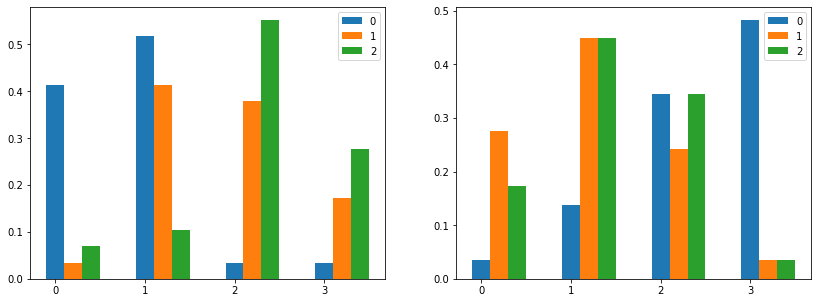

In [35]:
dd1.plot_model()
dd1.print_model()

In [36]:
dd1.get_class_proba(0)

[array([0.4137931 , 0.51724138, 0.03448276, 0.03448276]),
 array([0.03448276, 0.13793103, 0.34482759, 0.48275862])]

In [37]:
dd1.print_model(per_class=True)

 ++ Class(0) ++ 
[0.4137931  0.51724138 0.03448276 0.03448276]
[0.03448276 0.13793103 0.34482759 0.48275862]
 ++ Class(1) ++ 
[0.03448276 0.4137931  0.37931034 0.17241379]
[0.27586207 0.44827586 0.24137931 0.03448276]
 ++ Class(2) ++ 
[0.06896552 0.10344828 0.55172414 0.27586207]
[0.17241379 0.44827586 0.34482759 0.03448276]


In [38]:
y_pred = dd1.predict(X2d)
print("Test Set: Number of mislabeled points out of a total %d points : %d" % (X2d.shape[0], (y2 != y_pred).sum()))
y_pred = dd1.predict(X3d)
print("Noisy Set: Number of mislabeled points out of a total %d points : %d" % (X3d.shape[0], (y2 != y_pred).sum()))

Test Set: Number of mislabeled points out of a total 75 points : 22
Noisy Set: Number of mislabeled points out of a total 75 points : 32


In [39]:
dd1.score(X3d,y3)

0.5733333333333334

In [40]:
dd2 = Densities.Discrete(feature_probs=np.exp(dd1.feature_log_prob_))

In [41]:
dd2.__repr__()

'<pyspch.Densities.Discrete object at 0x000001C23FA3F7C8>'

In [42]:
dd2.__dict__

{'feature_prob_': array([[[0.4137931 , 0.51724138, 0.03448276, 0.03448276],
         [0.03448276, 0.4137931 , 0.37931034, 0.17241379],
         [0.06896552, 0.10344828, 0.55172414, 0.27586207]],
 
        [[0.03448276, 0.13793103, 0.34482759, 0.48275862],
         [0.27586207, 0.44827586, 0.24137931, 0.03448276],
         [0.17241379, 0.44827586, 0.34482759, 0.03448276]]]),
 'alpha': 1.0,
 'class_prior_': None,
 'n_features': 2,
 'n_categories': array([4, 4]),
 'n_classes': 3,
 'labels': [array(['0', '1', '2', '3'], dtype='<U11'),
  array(['0', '1', '2', '3'], dtype='<U11')],
 'classes_': array([0, 1, 2]),
 'priors': None}

++ Feature (0) ++
 


,0,1,2
P(0|.),0.413793,0.034483,0.068966
P(1|.),0.517241,0.413793,0.103448
P(2|.),0.034483,0.379310,0.551724
P(3|.),0.034483,0.172414,0.275862


++ Feature (1) ++
 


,0,1,2
P(0|.),0.034483,0.275862,0.172414
P(1|.),0.137931,0.448276,0.448276
P(2|.),0.344828,0.241379,0.344828
P(3|.),0.482759,0.034483,0.034483


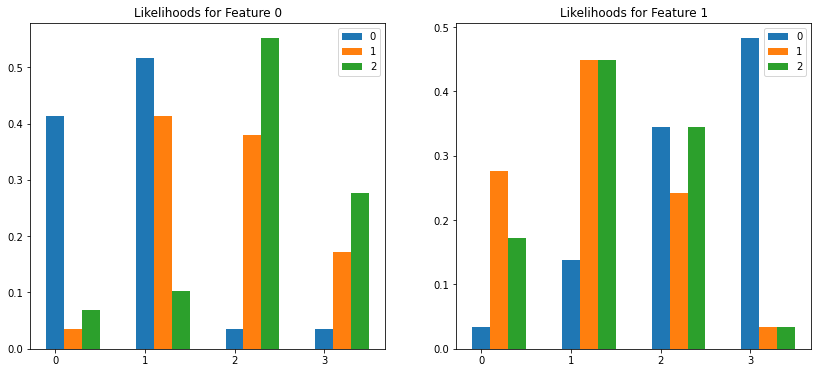

In [43]:
dd2.print_model()
dd2.plot_model()

In [44]:
dd2.__dict__

{'feature_prob_': array([[[0.4137931 , 0.51724138, 0.03448276, 0.03448276],
         [0.03448276, 0.4137931 , 0.37931034, 0.17241379],
         [0.06896552, 0.10344828, 0.55172414, 0.27586207]],
 
        [[0.03448276, 0.13793103, 0.34482759, 0.48275862],
         [0.27586207, 0.44827586, 0.24137931, 0.03448276],
         [0.17241379, 0.44827586, 0.34482759, 0.03448276]]]),
 'alpha': 1.0,
 'class_prior_': None,
 'n_features': 2,
 'n_categories': array([4, 4]),
 'n_classes': 3,
 'labels': [array(['0', '1', '2', '3'], dtype='<U11'),
  array(['0', '1', '2', '3'], dtype='<U11')],
 'classes_': array([0, 1, 2]),
 'priors': None}

In [45]:
import copy
dd3= copy.copy(dd2)
dd3.fit(X=X1d,y=y1)
dd3.__dict__

sorry


{'feature_prob_': array([[[0.4137931 , 0.51724138, 0.03448276, 0.03448276],
         [0.03448276, 0.4137931 , 0.37931034, 0.17241379],
         [0.06896552, 0.10344828, 0.55172414, 0.27586207]],
 
        [[0.03448276, 0.13793103, 0.34482759, 0.48275862],
         [0.27586207, 0.44827586, 0.24137931, 0.03448276],
         [0.17241379, 0.44827586, 0.34482759, 0.03448276]]]),
 'alpha': 1.0,
 'class_prior_': None,
 'n_features': 2,
 'n_categories': array([4, 4]),
 'n_classes': 3,
 'labels': [array(['0', '1', '2', '3'], dtype='<U11'),
  array(['0', '1', '2', '3'], dtype='<U11')],
 'classes_': array([0, 1, 2]),
 'priors': None}

In [46]:
dd3.alpha=.2
dd3.__dict__

{'feature_prob_': array([[[0.4137931 , 0.51724138, 0.03448276, 0.03448276],
         [0.03448276, 0.4137931 , 0.37931034, 0.17241379],
         [0.06896552, 0.10344828, 0.55172414, 0.27586207]],
 
        [[0.03448276, 0.13793103, 0.34482759, 0.48275862],
         [0.27586207, 0.44827586, 0.24137931, 0.03448276],
         [0.17241379, 0.44827586, 0.34482759, 0.03448276]]]),
 'alpha': 0.2,
 'class_prior_': None,
 'n_features': 2,
 'n_categories': array([4, 4]),
 'n_classes': 3,
 'labels': [array(['0', '1', '2', '3'], dtype='<U11'),
  array(['0', '1', '2', '3'], dtype='<U11')],
 'classes_': array([0, 1, 2]),
 'priors': None}

<AxesSubplot:>

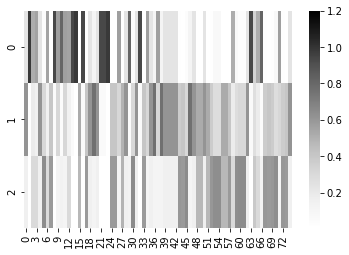

In [47]:
sns.heatmap(dd1.predict_proba(X3d).T,cmap='Greys',vmax=1.2)

### HMM Recognition

In [48]:
from pyspch import libhmm 


dd1.print_model(per_class=True)


 ++ Class(0) ++ 
[0.4137931  0.51724138 0.03448276 0.03448276]
[0.03448276 0.13793103 0.34482759 0.48275862]
 ++ Class(1) ++ 
[0.03448276 0.4137931  0.37931034 0.17241379]
[0.27586207 0.44827586 0.24137931 0.03448276]
 ++ Class(2) ++ 
[0.06896552 0.10344828 0.55172414 0.27586207]
[0.17241379 0.44827586 0.34482759 0.03448276]


In [49]:
imat = np.array([1.0, 0.0, 0.])
tmat = np.array([[.8,.2,0.],[0.,.8,.2],[0.,0.,1.]])

hmm1 = libhmm.HMM(n_states=3,prob_style="lin",obs_model=dd1,
                  transmat=tmat,initmat=imat)
hmm1.print_model()


HMM STATE MODEL



,0,1,2
Pinit(.),1.0,0.0,0.0


,0,1,2
P(0|.),0.8,0.0,0.0
P(1|.),0.2,0.8,0.0
P(2|.),0.0,0.2,1.0



OBSERVATION MODEL

 ++ Feature(0) ++ 
[[0.4137931  0.51724138 0.03448276 0.03448276]
 [0.03448276 0.4137931  0.37931034 0.17241379]
 [0.06896552 0.10344828 0.55172414 0.27586207]]
 ++ Feature(1) ++ 
[[0.03448276 0.13793103 0.34482759 0.48275862]
 [0.27586207 0.44827586 0.24137931 0.03448276]
 [0.17241379 0.44827586 0.34482759 0.03448276]]


In [50]:
hmm1.obs_model.__dict__

{'alpha': 1.0,
 'fit_prior': True,
 'class_prior': None,
 'min_categories': None,
 'n_features_in_': 2,
 'classes_': array([0, 1, 2]),
 'class_count_': array([25., 25., 25.]),
 'category_count_': [array([[11., 14.,  0.,  0.],
         [ 0., 11., 10.,  4.],
         [ 1.,  2., 15.,  7.]]),
  array([[ 0.,  3.,  9., 13.],
         [ 7., 12.,  6.,  0.],
         [ 4., 12.,  9.,  0.]])],
 'n_categories_': array([4, 4]),
 'feature_log_prob_': [array([[-0.88238918, -0.65924563, -3.36729583, -3.36729583],
         [-3.36729583, -0.88238918, -0.96940056, -1.75785792],
         [-2.67414865, -2.26868354, -0.59470711, -1.28785429]]),
  array([[-3.36729583, -1.98100147, -1.06471074, -0.7282385 ],
         [-1.28785429, -0.80234647, -1.42138568, -3.36729583],
         [-1.75785792, -0.80234647, -1.06471074, -3.36729583]])],
 'class_log_prior_': array([-1.09861229, -1.09861229, -1.09861229])}

In [51]:
X=X2d
tr = libhmm.Trellis(hmm1)
tr.viterbi_pass(X2d)
tr.backtrace()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

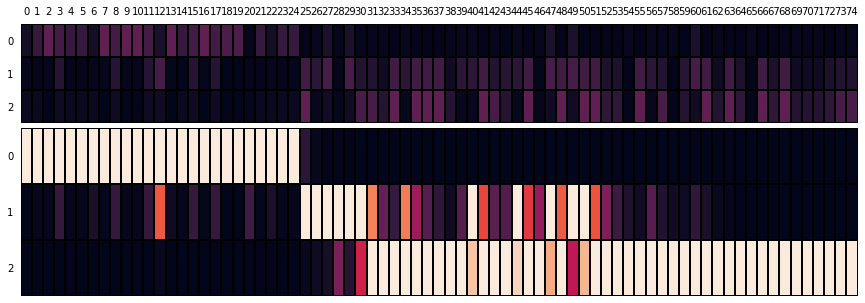

In [52]:
tr.plot_trellis(plot_norm=True,plot_obs_probs=True,plot_values=False,vmin=0.,vmax=1,figsize=(15,5))

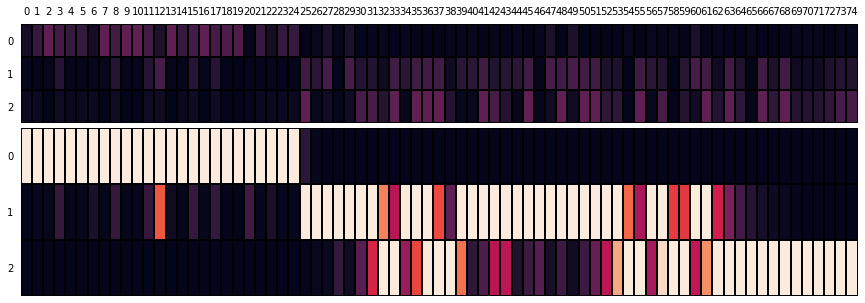

In [53]:
# change the transition probability in State 2
hmm2 = copy.copy(hmm1)
hmm2.transmat =  np.array([[.8,.2,0.],[0.,.9,.1],[0.,0.,1.]])
tr2 = libhmm.Trellis(hmm2)
tr2.viterbi_pass(X2d)
tr2.backtrace()
tr2.plot_trellis(plot_norm=True,plot_obs_probs=True,plot_values=False,vmin=0.,vmax=1,figsize=(15,5))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 1 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


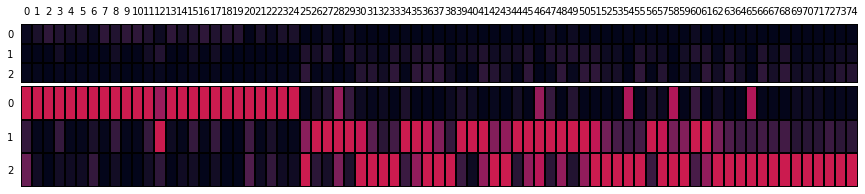

In [54]:
# change the transition probabilities to ergodic
hmm3 = copy.copy(hmm1)
hmm3.init_topology(type="ergodic")
#hmm3.transmat[2,2]=.5
#hmm3.transmat =  np.array([[.8,.2,0.],[0.,.9,.1],[0.,0.,1.]])
tr3 = libhmm.Trellis(hmm3)
tr3.viterbi_pass(X2d)
print(tr3.backtrace())
tr3.plot_trellis(plot_norm=True,plot_obs_probs=True,plot_values=False,vmin=0.,vmax=2,figsize=(15,3))